In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
import cobra
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Recon 3D model
model = cobra.io.read_sbml_model("Recon3D.xml")


# Define a function to find model gene IDs based on gene names
def find_gene_id_by_name(model, gene_name):
    for gene in model.genes:
        if gene.name == gene_name:
            return gene.id
    return None

# Example: Find the model gene ID for a gene name
gene_name = "FBP1"  
gene_id = find_gene_id_by_name(model, gene_name)
if gene_id:
    print(f"Gene name: {gene_name}, Gene ID: {gene_id}")
else:
    print(f"Gene name {gene_name} not found in the model.")

Gene name: FBP1, Gene ID: 2203_AT1


In [3]:
solution = model.optimize()  
#solution = cobra.flux_analysis.parsimonious.pfba(model)

In [6]:
solution    # shows normal flux of entire system as well as individual fluxes (gives sum of all fluzes now)

,fluxes,reduced_costs
24_25DHVITD3tm,0.0,0.000000e+00
25HVITD3t,0.0,0.000000e+00
COAtl,0.0,0.000000e+00
EX_5adtststerone_e,0.0,0.000000e+00
EX_5adtststerones_e,0.0,0.000000e+00
...,...,...
ACMPGLUTTRsc,0.0,2.088971e-18
FVSCOAhc,0.0,-9.638339e-02
MDZGLChr,0.0,0.000000e+00
TMACMPhr,0.0,2.389416e-17


In [7]:
solution.fluxes['FBP']

0.0

In [8]:
# changing the lower bound 
with model as model1:
    model1.reactions.get_by_id('FBP').lower_bound=-100
    solution_bounds = model1.optimize()
    #solution_bounds = cobra.flux_analysis.parsimonious.pfba(model1)

In [9]:
solution_bounds.fluxes['FBP']

-100.0

In [26]:
solution_bounds

,fluxes,reduced_costs
24_25DHVITD3tm,0.0,0.000000e+00
25HVITD3t,0.0,0.000000e+00
COAtl,0.0,0.000000e+00
EX_5adtststerone_e,0.0,0.000000e+00
EX_5adtststerones_e,0.0,0.000000e+00
...,...,...
ACMPGLUTTRsc,0.0,2.832207e-33
FVSCOAhc,0.0,-9.638339e-02
MDZGLChr,0.0,0.000000e+00
TMACMPhr,0.0,-8.301280e-18


In [10]:
# compare solution now with flux through FBP at -100 
flux_ind = solution.fluxes.index 
dif = np.zeros(len(flux_ind))
for i,idx in enumerate(flux_ind):
    dif[i] = solution_bounds.fluxes[idx] - solution.fluxes[idx] 


In [11]:
sorted_ind = np.argsort(-1 * np.abs(dif))

In [25]:
for i in range(len(sorted_ind)):
    if np.abs(dif[sorted_ind[i]]) > 90:
        print(dif[sorted_ind[i]],flux_ind[sorted_ind[i]])
        
    
    

-221.4903243960851 ALR3
-221.4903243960851 ALR2
221.4903243960851 LCARS
-221.49032439608507 ALCD22_L
154.70732734445653 GULN3D
154.70732734445642 DGULND
154.70732734445642 EX_xylu__L_e
154.70732734445642 XYLULte
154.70732734445642 GULND
-154.70732734445608 EX_glcur_e
154.70732734445608 GLCURtr
150.49732021648583 HMR_7749
-150.49732021648583 HMR_7748
122.36836921691545 G3PD1irm
-122.36836921691544 DHAPtm
-122.36836921691541 GLYC3Ptm
-117.21654370356868 SK_arg__L_c
-114.1081658307753 GLCt1
114.04496483287716 GLCt2_2
-100.0 FBP
-97.08209535730333 UROLACer
-97.08209535730333 GULLACter
97.08209535730333 GLACter
97.08209535730333 GLNLASEer
97.08209535730327 GLRASE
97.08209535730305 GULNDer
90.75884530769002 OAAt_1
90.75884530769 EX_oaa_e
90.71181503292104 AKGCITtm
90.71181503292064 r0915
90.71181503292064 r2375


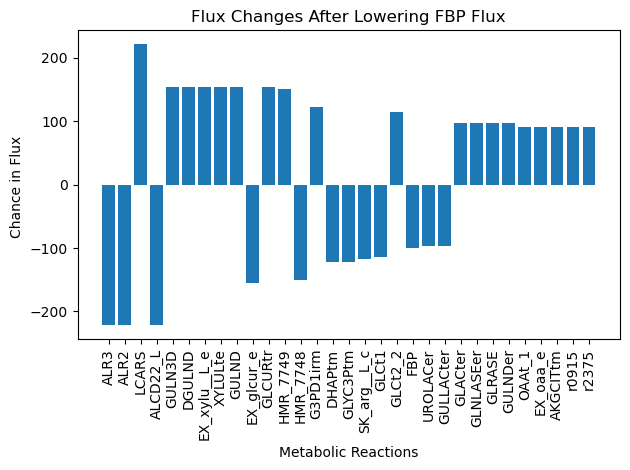

In [27]:
names = []
values = []
for i in range(len(sorted_ind)):
    if np.abs(dif[sorted_ind[i]]) > 90:
        names.append(flux_ind[sorted_ind[i]])
        values.append(dif[sorted_ind[i]])
# Plot
plt.bar(names, values)

# Title and labels for graph 
plt.xlabel('Metabolic Reactions')
plt.ylabel('Chance in Flux ')
plt.title('Flux Changes After Lowering FBP Flux')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Save plot 
plt.savefig('Flux_Changes_plot.png')

# Show plot
plt.show()
